In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
train_df = pd.read_csv("../datasets/train/train_emoticon.csv")
test_df = pd.read_csv("../datasets/test/test_emoticon.csv")

# 1. split the string into individual characters
# 2. run a correlation matrix on each category
# check number of distinct emotes

# Split the string into individual characters
train_df['characters'] = train_df['input_emoticon'].apply(list)

# Create new columns for each character
for i in range(len(train_df['characters'][0])):
    train_df[f'c_{i+1}'] = train_df['characters'].apply(lambda x: x[i] if len(x) > i else '')
l1 = [f'c_{i+1}' for i in range(len(train_df['characters'][0]))]
edf = train_df[l1].apply(lambda x: [ord(i) for i in x])
edf.insert(13, 'label', train_df['label'])
train_df[['input_emoticon', 'label']].head(25)

,input_emoticon,label
0,😛🛐😻😑😣🙠🙯🚼😒🙼😑🙯😣,0
1,🛐😑😪😛🚼🙯😣🚅😑🙯😹😣🙼,0
2,😛🙯😑🚡😣🚼🛐🙲😣🙯🛑😑🙼,0
3,😛🚼🛐🙐😣🙯😑🙪😑🙼🛆😣🙯,1
4,🛐🚟🚼😛🙋😑😣🙯😹🙯😑😣🙼,1
5,😑😣🚧😛🚜🚼🙯🛐🙼😣😑🙕🙯,1
6,😣😑🙯🚼🛐🚥😬😛😣🚄😑🙼🙯,0
7,🚡🚼😑🛐🚔🙯😛😣😑🙯🛓🙼😣,0
8,🛐😛🛜😑🚼😚😣🙯😣😑🙯🚠🙼,0
9,🙯😑🙷🛐🚼😣😛😍😿🙯🙼😑😣,1


In [4]:
emo = train_df['input_emoticon'].to_list()

## Approach 1 : Emoji to Text to BERT Embedding

In [5]:
import demoji

# Ensure emoji data is updated
demoji.download_codes()

# List of emojis to convert
emoji_list = ["😀", "🔥", "❤️", "😂", "🚀"]

# Convert each emoji to text description
text_list = [demoji.replace_with_desc(emoji) for emoji in emoji_list]

# Printing the results
for emoji, text in zip(emoji_list, text_list):
    print(f"Emoji: {emoji} -> Text: {text}")

Emoji: 😀 -> Text: :grinning face:
Emoji: 🔥 -> Text: :fire:
Emoji: ❤️ -> Text: :red heart:
Emoji: 😂 -> Text: :face with tears of joy:
Emoji: 🚀 -> Text: :rocket:


/var/folders/cs/t7hq7xj94n13sr47pvj399n00000gn/T/ipykernel_33659/3712595372.py:4: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [6]:
for i in range(13) :
    train_df[f'c_{i+1}_text'] = train_df[f'c_{i+1}'].apply(lambda x: demoji.replace_with_desc(x)[1:-1] if x != '' else x)

In [7]:
train_df.iloc[90]

input_emoticon                              🙯🚚😑😛🛌😣🚼🛐🙩🙯😣🙼😑
label                                                   0
characters        [🙯, 🚚, 😑, 😛, 🛌, 😣, 🚼, 🛐, 🙩, 🙯, 😣, 🙼, 😑]
c_1                                                     🙯
c_2                                                     🚚
c_3                                                     😑
c_4                                                     😛
c_5                                                     🛌
c_6                                                     😣
c_7                                                     🚼
c_8                                                     🛐
c_9                                                     🙩
c_10                                                    🙯
c_11                                                    😣
c_12                                                    🙼
c_13                                                    😑
c_1_text                                                 
c_2_text      

In [8]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load pre-trained model and tokenizer (e.g., BERT)
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModel.from_pretrained('bert-base-uncased')


/opt/miniconda3/envs/cs771/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/miniconda3/envs/cs771/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [9]:
def text2embed(text) :
    # Tokenize the input text and convert to input IDs and attention masks
    inputs = tokenizer(text, return_tensors='pt')

    # Generate embeddings (hidden states)
    with torch.no_grad():
        outputs = model(**inputs)

    # The embeddings are in the last hidden state
    # Shape: (batch_size, sequence_length, hidden_size)
    embeddings = outputs.last_hidden_state

    # To get a single embedding for the sentence, we typically pool the embeddings:
    # Mean pooling across the sequence length axis (axis=1)
    sentence_embedding = torch.mean(embeddings, dim=1)

    # print(sentence_embedding)
    return sentence_embedding.numpy().reshape(-1)

In [10]:
embed = text2embed('who is gay')

In [11]:
X = pd.DataFrame(columns=[f'c_{i+1}_embed' for i in range(13)])

In [12]:
X.head()

,c_1_embed,c_2_embed,c_3_embed,c_4_embed,c_5_embed,c_6_embed,c_7_embed,c_8_embed,c_9_embed,c_10_embed,c_11_embed,c_12_embed,c_13_embed


In [13]:
texts = []
for i in range(13) :
    for text in train_df[f'c_{i+1}_text'] :
        texts.append(text)
texts = list(set(texts))

In [14]:
dict_text2bed = {f'{text}' : text2embed(text) for text in texts}

In [15]:
import numpy as np

# Assuming embedding dimension is 768
embedding_dim = 768
num_columns = 13

# Initialize a list to store rows of combined embeddings
combined_embeddings = []

# Iterate over each row in the dataframe
for idx, row in train_df.iterrows():
    row_embeddings = []
    
    # Iterate over the 13 columns and get the embedding for each
    for i in range(num_columns):
        column_text = row[f'c_{i+1}_text']
        
        # If the text is not empty, fetch its embedding, else use a zero vector
        if column_text != '':
            embedding = dict_text2bed.get(column_text, np.zeros(embedding_dim))
        else:
            embedding = np.zeros(embedding_dim)
        
        # Append the embedding to the row list
        row_embeddings.append(embedding)
    
    # Concatenate the embeddings for the row
    combined_embeddings.append(np.hstack(row_embeddings))

# Convert the list of rows into a NumPy array
X = np.vstack(combined_embeddings)

# X is now a NumPy array where each row has 13 * 768 dimensions


In [16]:
X.shape
y = train_df['label']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Approach 2 : Emoji to Embedding directly

In [18]:
train_df

,input_emoticon,label,characters,c_1,c_2,c_3,c_4,c_5,c_6,c_7,...,c_4_text,c_5_text,c_6_text,c_7_text,c_8_text,c_9_text,c_10_text,c_11_text,c_12_text,c_13_text
0,😛🛐😻😑😣🙠🙯🚼😒🙼😑🙯😣,0,"[😛, 🛐, 😻, 😑, 😣, 🙠, 🙯, 🚼, 😒, 🙼, 😑, 🙯, 😣]",😛,🛐,😻,😑,😣,🙠,🙯,...,expressionless face,persevering face,,,baby symbol,unamused face,,expressionless face,,persevering face
1,🛐😑😪😛🚼🙯😣🚅😑🙯😹😣🙼,0,"[🛐, 😑, 😪, 😛, 🚼, 🙯, 😣, 🚅, 😑, 🙯, 😹, 😣, 🙼]",🛐,😑,😪,😛,🚼,🙯,😣,...,face with tongue,baby symbol,,persevering face,bullet train,expressionless face,,cat with tears of joy,persevering face,
2,😛🙯😑🚡😣🚼🛐🙲😣🙯🛑😑🙼,0,"[😛, 🙯, 😑, 🚡, 😣, 🚼, 🛐, 🙲, 😣, 🙯, 🛑, 😑, 🙼]",😛,🙯,😑,🚡,😣,🚼,🛐,...,aerial tramway,persevering face,baby symbol,place of worship,,persevering face,,stop sign,expressionless face,
3,😛🚼🛐🙐😣🙯😑🙪😑🙼🛆😣🙯,1,"[😛, 🚼, 🛐, 🙐, 😣, 🙯, 😑, 🙪, 😑, 🙼, 🛆, 😣, 🙯]",😛,🚼,🛐,🙐,😣,🙯,😑,...,,persevering face,,expressionless face,,expressionless face,,,persevering face,
4,🛐🚟🚼😛🙋😑😣🙯😹🙯😑😣🙼,1,"[🛐, 🚟, 🚼, 😛, 🙋, 😑, 😣, 🙯, 😹, 🙯, 😑, 😣, 🙼]",🛐,🚟,🚼,😛,🙋,😑,😣,...,face with tongue,person raising hand,expressionless face,persevering face,,cat with tears of joy,,expressionless face,persevering face,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7075,🙯😺😻😑😣🛐😛🚼🙼🙯😣😑🚠,1,"[🙯, 😺, 😻, 😑, 😣, 🛐, 😛, 🚼, 🙼, 🙯, 😣, 😑, 🚠]",🙯,😺,😻,😑,😣,🛐,😛,...,expressionless face,persevering face,place of worship,face with tongue,baby symbol,,,persevering face,expressionless face,mountain cableway
7076,🛐🚼😅🙯😣🙹😛😑😑🙼😣🚍🙯,1,"[🛐, 🚼, 😅, 🙯, 😣, 🙹, 😛, 😑, 😑, 🙼, 😣, 🚍, 🙯]",🛐,🚼,😅,🙯,😣,🙹,😛,...,,persevering face,,face with tongue,expressionless face,expressionless face,,persevering face,oncoming bus,
7077,🛜😑🙒😛😣🙯🛐🚼🙼🙬🙯😣😑,1,"[🛜, 😑, 🙒, 😛, 😣, 🙯, 🛐, 🚼, 🙼, 🙬, 🙯, 😣, 😑]",🛜,😑,🙒,😛,😣,🙯,🛐,...,face with tongue,persevering face,,place of worship,baby symbol,,,,persevering face,expressionless face
7078,😣😑😛🛋🛐🙯🚼🚪🙯😑🛀😣🙼,0,"[😣, 😑, 😛, 🛋, 🛐, 🙯, 🚼, 🚪, 🙯, 😑, 🛀, 😣, 🙼]",😣,😑,😛,🛋,🛐,🙯,🚼,...,couch and lamp,place of worship,,baby symbol,door,,expressionless face,person taking bath,persevering face,


In [19]:
emo_spaced = [' '.join(x) for x in emo]

In [20]:
emo_spaced

['😛 🛐 😻 😑 😣 🙠 🙯 🚼 😒 🙼 😑 🙯 😣',
 '🛐 😑 😪 😛 🚼 🙯 😣 🚅 😑 🙯 😹 😣 🙼',
 '😛 🙯 😑 🚡 😣 🚼 🛐 🙲 😣 🙯 🛑 😑 🙼',
 '😛 🚼 🛐 🙐 😣 🙯 😑 🙪 😑 🙼 🛆 😣 🙯',
 '🛐 🚟 🚼 😛 🙋 😑 😣 🙯 😹 🙯 😑 😣 🙼',
 '😑 😣 🚧 😛 🚜 🚼 🙯 🛐 🙼 😣 😑 🙕 🙯',
 '😣 😑 🙯 🚼 🛐 🚥 😬 😛 😣 🚄 😑 🙼 🙯',
 '🚡 🚼 😑 🛐 🚔 🙯 😛 😣 😑 🙯 🛓 🙼 😣',
 '🛐 😛 🛜 😑 🚼 😚 😣 🙯 😣 😑 🙯 🚠 🙼',
 '🙯 😑 🙷 🛐 🚼 😣 😛 😍 😿 🙯 🙼 😑 😣',
 '😣 🙯 🛐 😑 😛 🚼 🙚 😍 🙯 🙼 😣 😑 😸',
 '😛 😯 🚼 🙯 😑 🛐 😻 😣 🙼 🙯 😹 😑 😣',
 '😑 🙯 😛 🛐 🚼 🙒 🚙 😣 🙯 😣 😑 🙼 😬',
 '😿 😣 🚼 🚴 😛 😑 🙯 🛐 😣 🙯 😑 😴 🙼',
 '😛 🛐 🚼 🚂 🙯 😦 😣 😑 🙯 😑 😣 🙼 🙨',
 '🛐 🚼 🙯 🛝 😑 😉 😛 😣 🙒 😣 🙼 😑 🙯',
 '😣 🙯 😵 😑 😛 🚃 🚼 🛐 😣 🙯 🚜 🙼 😑',
 '😛 😑 🙯 🚼 🛆 🛐 😘 😣 😣 😊 🙼 😑 🙯',
 '🚟 😣 😑 🛐 😌 🚼 😛 🙯 🙯 😣 😑 😿 🙼',
 '😛 🚼 😑 😣 🙧 🛐 🙯 😉 🚍 😣 😑 🙯 🙼',
 '🛓 🛐 😣 🚼 🙯 🚥 😑 😛 😢 😣 🙯 😑 🙼',
 '😣 😑 🚵 😛 🚼 🛐 🙯 😊 🙼 😣 🙯 😑 😩',
 '🛐 🙯 😛 🚼 😣 😬 😠 😑 🙯 🙼 😣 😑 🛡',
 '🛐 🙯 🚜 😣 🚼 😑 😰 😛 😑 🙯 🚏 🙼 😣',
 '🚼 😛 🙯 😣 🚗 🛐 🙸 😑 😣 🙼 🙯 🚌 😑',
 '🚼 😓 😑 🚲 😛 🙯 🛐 😣 😆 🙼 😣 🙯 😑',
 '🚼 😣 🛐 😑 🛌 🙯 😛 😺 🙯 🙍 😣 🙼 😑',
 '😳 🚼 🛐 🚦 😑 😣 🙯 😛 🙯 😑 🙼 😣 🙍',
 '🙯 🚏 😣 😏 🛐 😑 🚼 😛 🙯 🙏 🙼 😑 😣',
 '🙯 🚼 😛 🛐 😣 😆 😰 😑 🚯 😑 😣 🙯 🙼',
 '😛 🙊 😑 😳 🛐 😣 🙯 🚼 🙼 😻 😣 🙯 😑',
 '😑 😤 🚼 🛐 😛 🙍 😣 🙯 😣 🙯 🙼 🙀 😑',
 '😛 😣 🛐 🚼 🙯 😑 😻 🛔 🙼 😑 🚷 😣 🙯',
 '🛐 🛈 😣 🚼 

In [21]:
import torch
from collections import defaultdict
from torch.nn.utils.rnn import pad_sequence

# Example list of sentences
sentences = emo_spaced

# Simple Tokenizer (word-to-index mapping)
class SimpleTokenizer:
    def __init__(self):
        self.word2idx = {}
        self.idx2word = {}
        self.vocab_size = 0
    
    def fit(self, sentences):
        idx = 1  # Start index from 1 (0 is reserved for padding)
        for sentence in sentences:
            for word in sentence.split():
                if word not in self.word2idx:
                    self.word2idx[word] = idx
                    self.idx2word[idx] = word
                    idx += 1
        self.vocab_size = idx
    
    def texts_to_sequences(self, sentences):
        sequences = []
        for sentence in sentences:
            sequences.append([self.word2idx[word] for word in sentence.split()])
        return sequences

# Initialize tokenizer and fit on sentences
tokenizer = SimpleTokenizer()
tokenizer.fit(sentences)

# Convert sentences to sequences of indices
sequences = tokenizer.texts_to_sequences(sentences)

# # Convert sequences to PyTorch tensors
# sequences = [torch.tensor(seq) for seq in sequences]

# # Pad the sequences
# padded_sequences = pad_sequence(sequences, batch_first=True, padding_value=0)
# print("Padded Sequences:\n", padded_sequences)


In [26]:
sequences
y = y.to_numpy()

In [23]:
X_train = 

SyntaxError: invalid syntax (83238862.py, line 1)

## XGBOOST

In [24]:
import numpy as np
from xgboost import XGBClassifier
print(X_train.shape)
X_train = X_train.reshape(X_train.shape[0], -1)
print(X_train.shape)
X_test = X_test.reshape(X_test.shape[0], -1)

(5664, 9984)
(5664, 9984)


In [129]:
X_train.shape, y_train.shape

((5664, 9984), (5664,))

In [130]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:42:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [150]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [147]:
def plot_confusion_matrix(y_true, y_pred, classes, title=None, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=cmap)
    plt.show()

def get_classification_report(y_true, y_pred):
    return classification_report(y_true, y_pred, target_names=['Class 0', 'Class 1'])

In [137]:
y_pred = xgb_model.predict(X_test)

report = get_classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

     Class 0       0.77      0.76      0.77       719
     Class 1       0.76      0.77      0.76       697

    accuracy                           0.77      1416
   macro avg       0.77      0.77      0.77      1416
weighted avg       0.77      0.77      0.77      1416



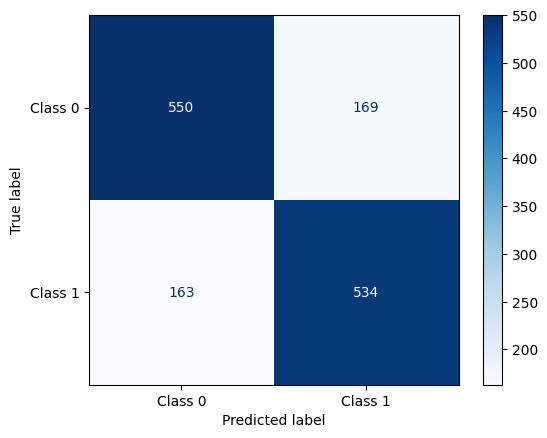

In [148]:
plot_confusion_matrix(y_test, y_pred, classes = ['Class 0', 'Class 1'], title='Train Confusion Matrix')

In [152]:
accuracy_score(y_test,y_pred)

0.7655367231638418